<img src="img/dsci511_header.png" width="600">

# Lab 3: Introduction to NumPy and Control flow

## Instructions

rubric={mechanics:5}

Follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).

Check off that you have read and followed each of these instructions:

- [ ] All files necessary to run your work must be pushed to your GitHub.ubc.ca repository for this lab.
- [ ] You need to have a minimum of 3 commit messages associated with your GitHub.ubc.ca repository for this lab.
- [ ] You must also submit `.ipynb` file and the rendered PDF in this worksheet/lab to Gradescope. Entire notebook must be executed so the TA's can see the results of your work. 
- [ ] **There is autograding in this lab, so please do not move or rename this file. Also, do not copy and paste cells, if you need to add new cells, create new cells via the "Insert a cell below" button instead.**
- [ ] To ensure you do not break the autograder remove all code for installing packages (i.e., DO NOT have `! conda install ...` or `! pip install ...` in your homework!
- [ ] Follow the [MDS general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).
- [ ] <mark>This lab has hidden tests. In this lab, the visible tests are just there to ensure you create an object with the correct name. The remaining tests are hidden intentionally. This is so you get practice deciding when you have written the correct code and created the correct data object. This is a necessary skill for data scientists, and if we were to provide robust visible tests for all questions you would not develop this skill, or at least not to its full potential.</mark>

## Code Quality
rubric={quality:5}

The code that you write for this assignment will be given one overall grade for code quality, see our code quality rubric as a guide to what we are looking for. Also, for this course (and other MDS courses that use R), we are trying to follow the PEP 8 code style. There is a guide you can refer too: https://peps.python.org/pep-0008/

Each code question will also be assessed for code accuracy (i.e., does it do what it is supposed to do?).

## Writing 
rubric={writing:5}

To get the marks for this writing component, you should:

- Use proper English, spelling, and grammar throughout your submission (the non-coding parts).
- Be succinct. This means being specific about what you want to communicate, without being superfluous.


In [1]:
import time
import numpy as np
import pandas as pd
import math
from random import gauss
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
plt.rcParams.update({'font.size': 14, 'axes.labelweight': 'bold'})

## Exercise 1: NumPy wrangling

### 1.1
rubric={autograde:10}

Below is a 400 x 400 pixel image of the UBC logo, imported and displayed with `matplotlib` (one of the most popular Python plotting packages).

Image shape: (400, 400)
Max. pixel value: 255
Min. pixel value: 0


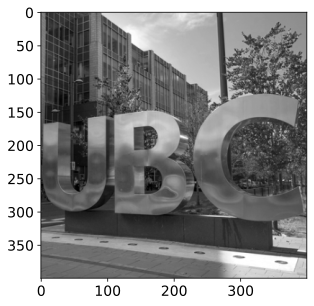

In [2]:
image = plt.imread('img/ubc.jpeg')[:, :, 0]
plt.imshow(image, cmap='gray')

print(f"Image shape: {image.shape}")
print(f"Max. pixel value: {image.max()}")
print(f"Min. pixel value: {image.min()}")

**Note:** The `cmap=gray` parameter in `plt.imshow()` is to force `matplotlib` to interpret the array as grayscale values (instead of showing an irrelevant colormap by default).

As you can see, `image` is just a NumPy array of size `(400, 400)`, with values ranging from 0 to 255.

Your task is to write a code that **flips the image about both the horizontal and vertical axes**, so that it looks as if we rotated the image 180 degrees clockwise:

![](img/ubc_flipped.jpeg)

- Do not overwrite the `image` variable, we will use it in later questions.

- NumPy has helpful functions for "flipping" arrays. Be sure to read the `numpy.flip()` docs ([here](https://numpy.org/doc/stable/reference/generated/numpy.flip.html)) to see how it works.

- **Don't forget to show your resulting image in the output using `plt.imshow()`.**

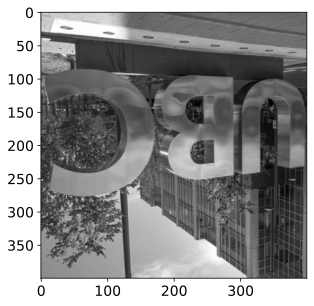

In [3]:
result = np.flipud(np.fliplr(image)) # SOLUTION

# Display the flipped image
plt.imshow(result, cmap='gray')
plt.show()

In [4]:
# TEST 
assert result.shape == image.shape, "Output shape should be equal to input shape"

In [5]:
# HIDDEN TEST
assert np.isclose(result[0, 0], image[-1, -1]), "Top-left pixel should be equal to bottom-right pixel of input"
assert np.isclose(result[-1, -1], image[0, 0]), "Bottom-right pixel should be equal to top-left pixel of input"
assert np.isclose(result[0, -1], image[-1, 0]), "Top-right pixel should be equal to bottom-left pixel of input"
assert np.isclose(result[-1, 0], image[0, -1]), "Bottom-left pixel should be equal to top-right pixel of input"
print ('Test passed')

Test passed


### 1.2
rubric={autograde:10}

Suppose that you want to prepare this image to post on Instagram, and you think a 20-pixels-wide black border will really make it stand out. Add a 20-pixels-wide black border to the image so that it looks like this:

![](img/ubc_border.jpeg)

**Hints:**

- The image including the border should remain 400 x 400 pixels (i.e., you are adding the border within the image), **do not** add it to the outside and make the image 440 x 440 pixels.

- Black pixels have a value of `0` (i.e., they have 0 brightness).

- There are many ways to solve this question so do it however you like, but `np.pad()` might be super helpful to make your solution shorter.

- **Don't forget to show your resulting image in the output using `plt.imshow()`.**

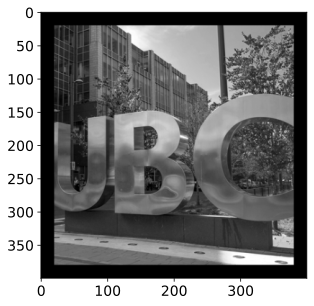

In [6]:
n = 20  # border size

padded = np.pad(image[n:-n, n:-n], n) # SOLUTION

plt.imshow(padded, cmap='gray')

In [7]:
# TEST
assert padded.shape == image.shape, "Output shape should be equal to input shape"

In [8]:
# HIDDEN TEST
assert np.array_equal(padded[:20,:], np.zeros((20, 400))), "Top border should be equal to 0"
assert np.array_equal(padded[-20:,:], np.zeros((20, 400))), "Bottom border should be equal to 0"
assert np.array_equal(padded[:,:20], np.zeros((400, 20))), "Left border should be equal to 0"
assert np.array_equal(padded[:,-20:], np.zeros((400, 20))), "Right border should be equal to 0"
print('Test passed')

Test passed


## Exercise 2: Vectorizing loops

### 2.1
rubric={accuracy:5,reasoning:5}

The following mathematical equation simulates a stock price using geometric Brownian motion. In this model, price in the next timestep $S_{t+1}$ depends on the current price $S_{t}$ as follows:

$$S_{t+1} = S_{t} \exp \left( -0.5\sigma^2 + \sigma Z \right)$$

where $Z$ is a random number drawn from a standard [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution), and $\sigma$ is the _volatility_ of the stock (i.e., if $\sigma=0$ then the stock price never changes, whereas if $\sigma$ is large the stock price can change wildly).

Here, we have the Python statements using   `S0`, and `sigma`, and  `T` that compute simulated stock prices according to the above given formula, and stores price values at each timestep as elements inside a Python list. 
<!-- This list is eventually returned by the function as the output: -->

In [9]:
S0 = 1.0
sigma = 0.1
T = 1000
S = [S0]

# append to list for each time step
for t in range(1, T):
    Z = gauss(0, 1)
    S.append(S[-1] * math.exp(-0.5 * sigma ** 2 + sigma * Z))

Your task here is to re-write the Python statements  using NumPy with the same `S0`, `sigma`, `T`, such that **you don't explicitly use for loops**.

Let's do some math first to simplify things a bit. Let's denote $\theta = \exp \left( -0.5\sigma^2 + \sigma Z \right)$, then:

$$S_{1} = S_{0} \theta_0$$

$$S_{2} = S_{1} \theta_{1} = S_{0} \theta_0 \theta_{1}$$

$$S_{3} = S_{2} \theta_{2} = S_{0} \theta_0 \theta_{1} \theta_{2}$$

$$\dots$$

$$S_{T} = S_{0} \prod_{t=0}^{T-1} \theta_{t}$$

- $\theta$ does not depend on the stock price at time `t`, so you can create $\prod_{t=0}^{T-1} \theta_{t}$ without using a loop.

- You can create an array of `Z`s with `np.random.randn()`.

- You can calculate the cumulative product of an array using the `cumprod()` method.

- Your function should return an `ndarray` object instead of a `list`.

<!-- - Don't forget to adapt the docstring of `simulate()` to your new function `simulate_np()`. -->

- You are given some plotting code to test out your function.

In [10]:
S0 = 1.0
sigma = 0.1
T = 1000
S_T = [S0]

np.random.seed(42) # DO NOT CHANGE

# BEGIN SOLUTION
Z = np.random.normal(0, 1, T-1)
theta = np.exp(-0.5 * sigma ** 2 + sigma * Z)
S_T = np.cumprod(theta) * S0
S_T = np.insert(S_T, 0, S0)  
# END SOLUTION

Text(0, 0.5, 'Stock price')

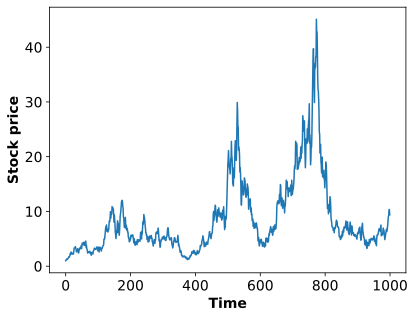

In [11]:
# Code you can use for plotting your function
S0=1 
sigma=0.1
T=1000

Z = np.random.normal(0, 1, T-1)
theta = np.exp(-0.5 * sigma ** 2 + sigma * Z)
S = np.cumprod(theta) * S0
price = np.insert(S, 0, S0)  

plt.plot(price)
plt.xlabel("Time")
plt.ylabel("Stock price")

### 2.2
rubric={accuracy:5,reasoning:5}

The goal of this question is to help drive home the power of vectorized array operations in NumPy vs iteration in base Python.

Write code to record how long it takes for iteration and your new-and-improved vectorized array operations to run 10,000 times (using their default values of `S0=1, sigma=0.1, T=1000`).

You can use the `time` module to help calculate the time it takes (in [real time](https://communities.sas.com/t5/SAS-Programming/Real-Time-vs-CPU-time/td-p/287743#:~:text=Real%20Time%20is%20the%20actual,the%20step%20utilises%20CPU%20resources.)) for your code to execute.

**Hints:**

- The `time` module has already been imported for you at the start of the lab.

- `time.time()` gives you the current clock time (so you can save a variable `start = time.time()` before you code and `end = time.time()` after your code and compare the difference).

In [2]:
# BEGIN SOLUTION
start = time.time()
for _ in range(10_000):
    S0 = 1.0
    sigma = 0.1
    T = 1000
    S = [S0]
    # append to list for each time step
    for t in range(1, T):
        Z = gauss(0, 1)
        S.append(S[-1] * math.exp(-0.5 * sigma ** 2 + sigma * Z))

end = time.time()
print(f"Time taken for 'without' verctorization: {end - start:.2f}s")
    
start = time.time()
for _ in range(10_000):
    np.random.seed(42) # DO NOT CHANGE
    Z = np.random.normal(0, 1, T-1)
    theta = np.exp(-0.5 * sigma ** 2 + sigma * Z)
    S = np.cumprod(theta) * S0
    S = np.insert(S, 0, S0)  
end = time.time()
print(f"Time taken for 'with' vectorization: {end - start:.2f}s")

# END SOLUTION

Time taken for 'without' verctorization: 3.54s
Time taken for 'with' vectorization: 0.22s


## Exercise 3: Control flow

The given Python code reads data from a file named `data.txt`, where each line of the file contains a floating-point number, such as:
```
1.2
2.1
2.3
4.2
```

1.	File Opening with with:
- The with statement is used to open the file data.txt in read mode (`'r'`). The `with` statement ensures the file is properly closed after the block of code is executed, even if an error occurs.
2.	Reading and Processing Data:
- The code iterates over each line in the file.
- `line.strip()` removes any leading or trailing whitespace (including the newline character).
- `float(line.strip())` converts the stripped line (which is a string) into a floating-point number.
- The list comprehension `[float(line.strip()) for line in file]` collects all the floating-point numbers into a list named data.


In [13]:
# Using `with` to open and read a file
with open('data.txt', 'r') as file:
    data = [float(line.strip()) for line in file]

### 3.1 Reading a File and Using a For Loop
rubric={accuracy:5,reasoning:5}



Your first task reads data from a file, then uses a traditional for loop to multiply each value by 2 and stores the result in a new list.

In [14]:
# BEGIN SOLUTION
# For loop to scale each value
scaled_data = []
for value in data:
    scaled_data.append(value * 2)
# END SOLUTION

### 3.2 Using Numpy and Broadcasting

rubric={accuracy:5,reasoning:5}


The second task reads the same data but leverages Numpy’s broadcasting to perform the operation more efficiently in a single line of code.

In [15]:
# BEGIN SOLUTION
# Assuming 'data.txt' is already read into a list called 'data'
data_array = np.array(data) * 2
# END SOLUTION

The Numpy approach is typically faster and more concise, which is why vectorization is preferred when working with large datasets.

### 3.3 if-else control flow:

rubric={accuracy:5,reasoning:5}

There was a major (> 8,600 acres) wildfire (named the El Dorado fire) that started on Saturday, September 5, 2020 in San Bernardino County which blame has been assigned to the use of a smoke-generating pyrotechnic device at a gender reveal party (Source: https://www.cbc.ca/news/world/califoronia-wildfires-september-7-gender-reveal-party-1.5714719). 

> <img src="https://i.cbc.ca/1.5715027.1599506927!/fileImage/httpImage/image.jpg_gen/derivatives/16x9_780/california-wildfires.jpg" width=300>
>
> *A firefighter battles the Creek Fire as it threatens homes in the Cascadel Woods neighborhood of Madera County, Calif., on Monday, Sept. 7, 2020. (Noah Berger/The Associated Press)*
Below we give you two ordered lists, the first contains the air quality index (AQI) values, the daily reported measured values of AQI, for the area of Los Angeles-Long Beach-Anaheim, California, USA for 18 days. This is the closest major city to the El Dorado fire. The second ordered list contains the dates for each measurement. Data source: https://www.epa.gov/outdoor-air-quality-data/air-data-daily-air-quality-tracker

<!-- Your task is to use base R control flow (specifically `for` loops and `if`/`else` statements) to calculate the average of the maximum daily AQI measurements, before the fire began, and afterwards. Use a `print` statement to output your results in a sentence that communicates your findings. *Hint: `paste` will be a useful function for this.*  -->

Note: treat the AQI from `2020-09-05` (the day the fire started) in the group after the fire.


In [16]:
# Data
aqi = [165, 179, 199, 136, 91, 121, 161, 78, 84, 80, 73, 55, 57, 55, 55, 55, 62, 68]
date = ["2020-09-13", "2020-09-12", "2020-09-11", "2020-09-10", "2020-09-09", "2020-09-08", 
        "2020-09-07", "2020-09-06", "2020-09-05", "2020-09-04", "2020-09-03", "2020-09-02", 
        "2020-09-01", "2020-08-31", "2020-08-30", "2020-08-29", "2020-08-28", "2020-08-27"]

# Initialize variables
avg_max_before = 0
before_count = 0
avg_max_after = 0
after_count = 0


# BEGIN SOLUTION
# Loop through dates and AQI values
for i in range(len(date)):
    if date[i] < "2020-09-05":
        avg_max_before += aqi[i]
        before_count += 1
    else:
        avg_max_after += aqi[i]
        after_count += 1

# Calculate averages
avg_max_before /= before_count
avg_max_after /= after_count
# END SOLUTION

In [17]:
# Output results
print(f"The nine day daily average of reported AQI values before the fire was {round(avg_max_before)}")
print(f"The nine day daily average of reported AQI values after the fire was {round(avg_max_after)}")

The nine day daily average of reported AQI values before the fire was 62
The nine day daily average of reported AQI values after the fire was 135


### 3.4 list comprehensions

rubric={accuracy:5,reasoning:5}


Imagine you’re working as a data analyst for a popular movie streaming platform. The platform has gathered data on user ratings for various movies. The ratings are stored in a list of tuples, where each tuple contains the movie title and its user rating (on a scale from 1 to 10). Your task is to filter out movies that have a rating of 7 or higher, as the company considers these “highly rated” and wants to recommend them to other users.

Note: Write a Python script that takes in a list of movie ratings (as described) and uses list comprehension to create a new list containing only the titles of movies with a rating of 7 or higher.

In [18]:
# Define the list of movies with their ratings
movies = [
    ("The Matrix", 8),
    ("Inception", 9),
    ("The Room", 3),
    ("Toy Story", 7),
    ("Cats", 4)
]

# BEGIN SOLUTION
# Use list comprehension to filter movies with a rating of 7 or higher and extract their titles
highly_rated_movies = [title for title, rating in movies if rating >= 7]

# END SOLUTION

In [19]:
# Print the result
print(highly_rated_movies)

['The Matrix', 'Inception', 'Toy Story']


### Exercise 4 (CHALLENGING)
rubric={accuracy: 5}

In DSCI 572 you'll learn about [Convolutional Neural Networks](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN), which are often used when working with image data. A common operation in a CNN architecture is [pooling](https://cs231n.github.io/convolutional-networks/#pool), in which you reduce the size of an image by looking at a small window of pixels, say a 4 x 4 window of pixels, and representing that window using e.g., the max/min/mean value of the pixels in the window.

Below is an example of mean pooling, transforming a 6 x 6 image into a 3 x 3 image by taking the mean of 2 x 2 pixel windows:

<img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/average-pooling-a.png?58f9ab6d61248c3ec8d526ef65763d2f" width="400">

Source: [stanford.edu](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)

Let's implement pooling in NumPy here to get a feel of how it works. We can do it by reshaping our image into `n x n` windows and then calculating the `.max()` of each window. Your task here is to implement **mean** pooling on the UBC logo image using a `10 x 10` window, resulting in an image that will look like this:

![](img/ubc_mean_pool.jpeg)

**Hints:**

- There are plenty of ways you could solve this question. One way is to start by reshaping each axis of the image into shape `(40, 10)` to end up with a 4D array of shape `(40, 10, 40, 10)`.

- Then apply `.mean()` to the reshaped data on both axes of size 10. You can specify multiple axes to operate on simultaneously by passing a tuple to the `axis=` parameter of the `mean()` method.

- Play around with you code to get a feel for what pooling does. What happens if you increase/decrease the pooling window size? Also feel free to try using `min()` or `max()` methods, for example: 

![](img/ubc_min_pool.jpeg)

- See [here](https://stackoverflow.com/a/42463514) for more help.

- **Don't forget to show your resulting image in the output using `plt.imshow()`**

Text(0.5, 1.0, 'Window: 10 x 10, Function: mean')

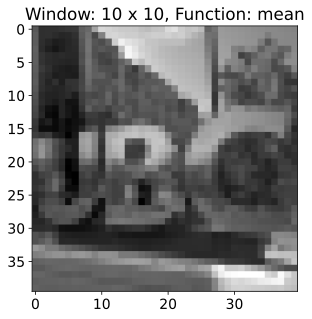

In [21]:
# BEGIN SOLUTION
n = 10
rows, cols = image.shape
#image.reshape(40, 10, -1, 10).mean(axis=(1, 3))
pooled = image.reshape(rows // n, n, -1, n).mean(axis=(1, 3))
plt.imshow(pooled, cmap='gray')
plt.title(f"Window: {n} x {n}, Function: mean")
# END SOLUTION

**Reason for choosing the target shape of `(40, 10, 40, 10)`:**

The goal in this question is to compute the average of pixel values over `10 x 10` windows. Obviously, we can do this in a straight-forward manner by writing a Python for-loop, but that would be a very inefficient solution. So we would like to come up with a solution that can benefit from high-performance vectorized NumPy functions, e.g. `.mean()` in this case.

However, it is not possible to use `.mean()` directly for this purpose, as `.mean()` can at best compute mean values along each dimension of the array. In the case of a gray-scale image, it means that we can compute the mean pixel value either along the row dimension (uisng `.mean(axis=0)`, which returns mean values of all columns), or along the column dimension (uisng `.mean(axis=1)`, which returns mean values of all rows). This is why we have to reshape our image array in a clever way to accommodate such a computation in a vectorized way.

Let's now why `(40, 10, 40, 10)` is the right target shape to achiev this goal:

- Since we want to compute the average value over `10 x 10` windows, it makes intuitive sense to reshape each row in the original array (have 400 values) to `(40, 10)` (again, 400 values in total, just different shape). In this way, we have split each original row into an array that has 10 rows and 40 columns. We are now able to compute the average value of each group of 10 values using `.mean(axis=1)`.

- Alright, that just one row. What should we do with the other 399 rows? Would it help to stack 400 such sub-arrays (each representing one row of the original image) on top of each other to have a reshaped array with shape `(400, 40, 10)`? If we do that and then try to take the mean using `.mean(axis=(0, 2))` for example, this would give the average pixel value for `(400, 10)` slices of the original image (because each `(40, 10)` sub-array in the `(400, 40, 10)` array represents one row). Well, this is not what we want.

- The solution starts to reveal itself at this point. Just as we solved the problem of taking groups of 10 values from **each row**, by reshaping each row into `(40, 10)` sub-arrays, we can do the same thing **the sub-arrays** too:
  
  - When we stacked 400 `(40, 10)` sub-arrays, what we actually did was to put 400 `(40, 10)` sub-arrays into a **one-dimensional vector**.

  - So, instead of puting those inside of a vector, why not puting those 400 sub-arrays into a **two-dimensional array**? Instead of having 400 sub-arrays all side by side, we can organize them into 40 rows and 10 columns. Why this particular choice? We'll find out in a bit. Let's call this array the **outer array**.
  
  - The result will be an array of shape `(40, 10)`, each element of which is itself an array of shape `(40, 10)`. In other words, the original image of shape `(400, 400)` is now reshaped into `(40, 10, 40, 10)`.

  - Now if you think about it carefully, the choice of the shape `(40, 10)` for the outer array becomes clearer: each row of the outer array contains 10 sub-arrays, each of which contains data for one row of the original image. This means that, if we take the first row of each sub-array (10 values) in the first row of the outer array (10 items), we have actually selected the pixel values located in the first `10 x 10` window of the original image!

  - The foregoing selection is equivalent to taking all items along the 4th and 2nd dimensions. Since the pixels are now appropriately organized, we can easily compute the mean using NumPy vectorized mean function: just run `image.mean(axis=(1, 3))`. The output of this will be a 2-dimensional array (the averaged image), each element of which is the average value of pixels inside each `10 x 10` window over the original `400 x 400` image.